<a href="https://colab.research.google.com/github/wlgp8563/RA_RNNSentiment/blob/main/RNN_%EA%B0%90%EC%84%B1%EB%B6%84%EB%A5%98_%EC%A0%95%EC%83%81%EC%9E%91%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.13-1+bionic1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install -U torchtext==0.6.0

     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 61.7 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.11.0
    Uninstalling torchtext-0.11.0:
      Successfully uninstalled torchtext-0.11.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

17473536/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [ ]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


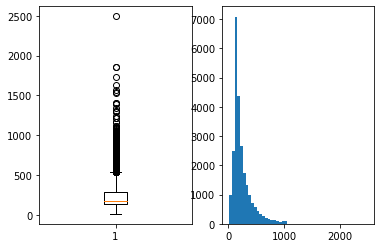

In [ ]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))
len_result = [len(s) for s in X_train]

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [ ]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [ ]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [ ]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
312/313 [============================>.] - ETA: 0s - loss: 0.4955 - acc: 0.7606
Epoch 1: val_acc improved from -inf to 0.81060, saving model to GRU_model.h5
313/313 [==============================] - 16s 31ms/step - loss: 0.4955 - acc: 0.7606 - val_loss: 0.4072 - val_acc: 0.8106
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3146 - acc: 0.8707
Epoch 2: val_acc improved from 0.81060 to 0.83200, saving model to GRU_model.h5
313/313 [==============================] - 9s 28ms/step - loss: 0.3146 - acc: 0.8707 - val_loss: 0.4246 - val_acc: 0.8320
Epoch 3/15
311/313 [============================>.] - ETA: 0s - loss: 0.2446 - acc: 0.9053
Epoch 3: val_acc improved from 0.83200 to 0.88120, saving model to GRU_model.h5
313/313 [==============================] - 8s 27ms/step - loss: 0.2447 - acc: 0.9053 - val_loss: 0.2878 - val_acc: 0.8812
Epoch 4/15
312/313 [============================>.] - ETA: 0s - loss: 0.1903 - acc: 0.9302
Epoch 4: val_acc improved from 0

In [ ]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 7s 9ms/step - loss: 0.3030 - acc: 0.8907

 테스트 정확도: 0.8907


In [ ]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
test_input1 = """Upon launching the game, The Game itself, in a voiceover, tries to discourage and actively stop the User from playing, although never explicitly saying why. Once the User works around the barriers set up by Game, upon launching unleashes a dimensional rift and a software anomaly who calls itself "Mr Glitch", who declares his intention on doing something to the world – in a running joke, his plan is never actually heard due to some external circumstances, such as advertisements and codes."""

sentiment_predict(test_input1)

85.92% 확률로 부정 리뷰입니다.


In [ ]:
test_input2="""Game and the User are then transported through various games: First, into a classic point and click whose visual and gameplay style resembles Day of the Tentacle's, starring Sherlock Holmes, and next, into a top-down adventure game that resembles The Legend of Zelda called "The Legend Of The Secret". After completing the second game, Mr Glitch appears and traps Game and the User by modding The Legend Of The Secret into an free-to-play clicker game filled with loot boxes. After completing that, Game and the User are transported into the end credits, where Mr Glitch is trapped; upon releasing it, Mr Glitch betrays Game, but accidentally releases GiGi: GiGi (short for "Global Gameplay") was Game's partner and main gameplay component until the developer decided to separate the two – without gameplay, Game was, as the title says, no longer a game. Left with no choice, the User, Game and GiGi go through another portal again to pursue Mr Glitch."""

sentiment_predict(test_input2)

73.11% 확률로 긍정 리뷰입니다.


In [ ]:
test_input3 = """The portal leads back to the title screen of the original game, but GiGi is nowhere to be found – distraught and heartbroken, Game encourages the User to quit the game; when the User refuses, infuriated, he pretends to delete the save file. When the User causes a memory leak, Game and the User go through another portal, leading to a cellphone belonging to the original developer of the game, The Creator (Cammisotto himself). They find GiGi inside, who explains that when The Creator ran out of development money, he decided to shelve Game and repurposed GiGi for a GPS-based mobile game, akin to  Ingress; the removal of GiGi, in turn, caused the creation of Mr Glitch. After making contact with The Creator, GiGi discovers that Mr Glitch has gone out to the world and is causing disruptions in technology across the globe. In an attempt to fix Game, The Creator decides to merge him with GiGi again; with the User's help, they hold off Mr Glitch just long enough that The Creator succeeds, and GiGi and Game become a functional game again."""
sentiment_predict(test_input3)

92.58% 확률로 긍정 리뷰입니다.


In [ ]:
test_input4="""GiGi suggests to Game to let the User finally play, but Game insists that as Mr Glitch is still a threat, and offers the User a choice between playing the game or deleting it. If the User chooses to play the game, the game boots up, crashes immediately and Mr Glitch reappears. If the User chooses to delete the game, Game dramatically acts out being deleted so that the User leaves him alone with GiGi, but after getting a sudden urgent message, ends up potentially needing the User's help once again, for a potentially bigger threat. However, due to leaving the User unable to interact, Game is unsure whether the User is still there or not."""
sentiment_predict(test_input4)

55.05% 확률로 긍정 리뷰입니다.


In [ ]:
test_input5="""The Obra Dinn, an East Indiaman trade ship, departs from Falmouth to the Orient in 1802 with 51 crewmen and 9 passengers. The ship fails to meet her rendezvous at the Cape of Good Hope, and is declared lost. Five years later, the Obra Dinn reappears off the coast of England with every hand either dead or missing. The East India Company sends its Chief Inspector to determine what happened aboard the ship. The inspector has received from Henry Evans, the ship's surgeon, a logbook and the Memento Mortem stopwatch. With these and other clues, the inspector works out the sequence of events after the ship's launch."""
sentiment_predict(test_input5)

69.67% 확률로 긍정 리뷰입니다.


In [ ]:
test_input6="""The Obra Dinn had launched with a number of passengers, including two royal Formosans and their guards carrying an exquisite treasure chest. Initial calamity struck after launch, with one crew member killed by falling cargo, and two others taken by pneumonia. However, a small group of the crew saw the potential of stealing the Formosan chest and, as they neared the Canary Islands, abducted the royal Formosans and the chest via rowboat and fled. However, three mermaids ambushed the boats killing most of the group. The mermaids' attack was quelled when a Formosan used a magical shell pulled from the chest to stun the mermaids, but resulted in his death. The remaining crew member returned to the Obra Dinn, along with the captured mermaids (who also had shells), but he was shot on approach by the surviving Formosan guard. As they were brought aboard, the mermaids attacked and killed more of the crew before they were subdued and locked in the lazarette."""
sentiment_predict(test_input6)

76.08% 확률로 긍정 리뷰입니다.


In [ ]:
test_input7="""The Obra Dinn circled around to return to England due to the increasing number of deaths. As they started their return, the mermaids caused a terrible storm to strike, and a pair of sea demons mounted on giant spider crabs boarded the ship intent on reaching the lazarette to liberate the mermaids, killing more of the crew before being put down. Shortly after dispelling the first assault, the ship was attacked by a kraken, killing more crewmen and the captain's wife. The captain went to the lazarette and threatened to kill all the mermaids in hopes of ending the attack. He executed two before the final one called off the kraken. The shells and the surviving mermaid were then tossed overboard by one of the Captain's mates, with the mermaid agreeing to guide the ship back to England. The surviving passengers and some of the crew decided to abandon the Obra Dinn and make for the western coast of Africa. Evans, knowing that the East India Company will investigate the ship via the Memento Mortem, purposefully killed his pet monkey inside the locked lazarette, and kept its paw for safekeeping before leaving with the others. The three remaining crewmen turned on the captain, wanting to reclaim the chest and shells as compensation for their hardships, not knowing they were already thrown overboard. The captain killed the mutineers, and then, next to his wife's body, committed suicide."""
sentiment_predict(test_input7)

97.04% 확률로 부정 리뷰입니다.


In [ ]:
test_input8="""nd an insurance report is written, compensating or fining the estates of lost crewmen, depending on their conduct. A year later, Evans mails the book back to the inspector along with the monkey's paw, allowing them to use the Memento Mortem to discover what happened in the lazarette and complete the story of the Obra Dinn."""
sentiment_predict(test_input8)

77.60% 확률로 긍정 리뷰입니다.


In [ ]:
test_input9="""In Goodbye Despair, players control Hajime Hinata, an amnesiac boy who has just become one of Hope's Peak Academy's "Ultimate" students alongside fifteen others who befriend the calm but mentally unstable Nagito Komaeda. The game is set on a remote tropical island called Jabberwock Island, where they have been marooned by their alleged teacher, a small, rabbit-like mascot named Usami, who claims it to be a field trip. However, the school's principal Monokuma announces the students cannot leave the island unless they murder another student and get away with it. If the students can identify a murderer in a Class Trial, that culprit is executed, but if they make the wrong assumption the killer goes free whilst everyone else is sentenced to death."""
sentiment_predict(test_input9)

95.86% 확률로 부정 리뷰입니다.


In [ ]:
test_input10="""Several students are murdered over the course of the game, and, through Hajime's investigation, the killers are discovered and executed. Byakuya Togami (later revealed The Ultimate Impostor) is inadvertently killed by Chef Teruteru Hanamura in an attempt to stop Nagito from committing the first murder. Photographer Mahiru Koizumi is killed by swordswoman Peko Pekoyama, to prevent yakuza Fuyuhiko Kuzuryu from killing her to avenge his sister. Musician Ibuki Mioda and traditional dancer Hiyoko Saionji are killed by nurse Mikan Tsumiki as she was under the effects of Despair Disease. Team Manager Nekomaru Nidai is killed by animal breeder Gundham Tanaka in an honorable duel to prevent the rest of the students starving to death. As these murders occur, new areas of the islands are discovered and the group becomes aware of an organization monitoring them, the "Future Foundation". Nagito, through a convoluted process, arranges his own death so that Chiaki Nanami is considered his killer, and executed. During the graduation, it is learnt that she is actually an AI program created by the late Chihiro Fujisaki to observe and protect the students during the Future Foundation's experiment. After Chiaki's death, Hajime recovers a memory of arriving at the islands with Nagito, who had transplanted the arm of a woman, Junko Enoshima. As reality falls apart around him, Hajime learns that Nagito and his fellow students are surviving members of Ultimate Despair, a group Junko led, whose terrorist actions led to a crisis known as the Tragedy, which caused societal collapse worldwide."""
sentiment_predict(test_input10)

99.16% 확률로 긍정 리뷰입니다.


In [ ]:
test_input11="""The Future Foundation has been attempting to undo Ultimate Despair's damage. Makoto Naegi captured the surviving members but, rather than executing them, decided to rehabilitate them by erasing their memories and putting them in a virtual reality program. Makoto warns Hajime that an artificial intelligence copy of Junko has hijacked their program and is trying to manipulate events to possess the bodies of the deceased students, which are still intact in the real world, once the surviving students "graduate". Alter Ego Junko's ultimate plan is to download herself into every person on the planet. Makoto tells Hajime if the class votes not to graduate, it will allow him to reset the system and purge Alter Ego Junko."""
sentiment_predict(test_input11)

86.28% 확률로 부정 리뷰입니다.


In [ ]:
test_input12="""Junko attempts to deter Hajime by revealing he is Izuru Kamukura, the former leader of Ultimate Despair. The other students hesitate, afraid of reverting to their original personalities, but Hajime eventually finds the inner courage to thwart Alter Ego Junko's plan, and persuades the other students, Fuyuhiko, princess Sonia Nevermind, mechanic Kazuichi Soda, and gymnast Akane Owari to refuse graduation, proposing that they create a future in which they do not have to forget. Hajime, Makoto and the others reset the system, delete Alter Ego Junko and retain their memories. In the epilogue, Makoto is confident the students will find a way to revive their friends."""
sentiment_predict(test_input12)

97.77% 확률로 긍정 리뷰입니다.


In [ ]:
test_input13="""A year after leaving his former life in the Tojo Clan behind, ex-yakuza Kazuma Kiryu is called back into action when the clan's Fifth Chairman, Yukio Terada, is murdered by assassins from a rival organization, the Omi Alliance. Returning to Kamurocho, Kiryu must find a new chairman for the Tojo Clan and prevent an all-out war between the Tojo and the Omi, bringing him into conflict with Ryuji Goda, the legendary "Dragon Of Kansai" of the Omi Alliance."""
sentiment_predict(test_input13)

74.62% 확률로 긍정 리뷰입니다.


In [ ]:
test_input14="""A new scenario, entitled "The Majima Saga" exclusive to Kiwami 2 explains how Majima came to leave the Tojo Clan following the death of his patron, Futoshi Shimano, a year earlier and form a legitimate enterprise, "Majima Construction", between Yakuza and Yakuza 2. The scenario also features the return of Makoto Makimura, a major character of Majima's story in Yakuza 0."""
sentiment_predict(test_input14)

94.51% 확률로 부정 리뷰입니다.


In [ ]:
test_input15="""In February 2006, Tojo Clan's Fifth Chairman Yukio Terada announces a reformation plan for the clan, which requires a replacement for the clan captain position. Up in the run for the position were newcomer Akinobu Uematsu, Kei Ibuchi and Goro Majima, who were making the most profits among the clan. Having no interest in the position and only participating to ensure the other families can band together to keep the newcomers from seizing power, Majima returns to Kamurocho, where he finds himself ambushed by several assassins. After quickly dealing with them, Majima returns to his family office, where he finds his men beaten supposedly by the Uematsu Family. Majima heads to Uematsu's office, but finds Uematsu himself shot dead. After reporting the incident to Tojo Clan members, Majima is tipped by Kazama Family patriarch Osamu Kashiwagi to find the Florist of Sai, who can provide him information. Upon meeting with the Florist, he agrees to help Majima in exchange for the latter's agreement in running the Florist's old base in Purgatory. Majima learns that one of his subordinates, Ryota Kawamura, was last seen at the crime scene. He travels back to Sotenbori to track down Kawamura, and eventually learns that he's a regular gambler who frequents the massage parlor Hogushi Kaiken. While at the parlor, Majima receives service from a woman named Tateyama, who turns out to be Makoto Makimura, who Majima saved from the Tojo Clan 18 years prior. Majima, while attempting to hide his identity, learns that Makoto still kept her old watch as a memento of her savior."""
sentiment_predict(test_input15)

95.55% 확률로 긍정 리뷰입니다.


In [ ]:
test_input16="""Majima later picks up a tip that Kawamura murdered an Omi Alliance officer at the Cabaret Grand. He heads there and confronts Kawamura. The latter is easily defeated, but is then shot dead by Ibuchi, who exploited Kawamura's debt to use him to get rid of Uematsu, in order to spark a war between the Omi Alliance and the Tojo Clan, which would lead to their eventual merging and Ibuchi seizing power from Terada. Majima defeats Ibuchi, but the latter commits suicide rather than allowing himself to be arrested to incite conflict between both sides. In the aftermath, Majima and Terada come to an agreement to disband his family, as a gesture of apology for Kawamura's action against the Omi Alliance. Majima and the remnants of his family then form Majima Construction, and begin work on the Kamurocho Hills complex. Some time later, Makoto leaves the country with her family; she receives an anonymous gift prior to her departure, which turns out to be a replacement strap for her watch. Realizing that her customer that day was also her savior 18 years ago, Makoto finally finds comfort knowing she has no regrets leaving Japan."""
sentiment_predict(test_input16)

99.19% 확률로 긍정 리뷰입니다.


In [ ]:
test_input17="""Mono, a boy wearing a paper bag over his head, awakens from a dream of a door marked with an eye at the end of a hallway. He journeys through the Wilderness and enters a decrepit shack. He frees Six, who is being held prisoner by the masked Hunter who lives there. The Hunter pursues the pair until he corners them and they kill him with a shotgun. Using a door as a raft, Mono and Six drift across a body of water and wash up at the Pale City, which is shrouded by mist and rain and strewn with old television sets. Throughout the journey, Mono attempts to use televisions as portals to enter the hallway from his dream. However, he's always pulled back out by Six before he can reach the door. He also encounters several ghostly, glitching remains of children, which he can absorb by interacting with them."""
sentiment_predict(test_input17)

86.39% 확률로 부정 리뷰입니다.


In [ ]:
test_input18="""Mono and Six enter the School, where they are separated when Six is captured by the porcelain Bullies, the School's rabid students. Mono rescues Six and they escape the long-necked Teacher. Outside the School, Six finds her signature yellow raincoat. The pair reach the Hospital, where they encounter the mannequin-like Patients, their detached Living Hands, and the bulbous Doctor who crawls on the ceilings. Mono lures the Doctor into an incinerator and may choose to kill him or leave him trapped inside. Mono and Six then exit into the heart of the Pale City. They spot the Signal Tower, which emits a pervasive Transmission that controls the city's inhabitants: the TV-addicted Viewers, whose faces have been distorted from prolonged exposure to it. When Mono finally reaches the door through a television set, it opens to reveal the spectral Thin Man. After Mono is pulled out from the television, the Thin Man emerges too and captures Six, leaving behind a glitching shadow of her. Six's shadow remains lead Mono close to the Signal Tower, where he confronts the Thin Man. Discovering he has powers similar to the Thin Man's, Mono takes his bag off and battles and disintegrates him before pulling the Signal Tower towards himself."""
sentiment_predict(test_input18)

94.64% 확률로 긍정 리뷰입니다.


In [ ]:
test_input19="""Mono enters the Signal Tower and finds Six, now a distorted giant. She becomes hostile when he damages her music box, but Mono returns her to normal by destroying it. As the Signal Tower begins to crumble, the children are pursued by the gelatinous mass of flesh and eyes which forms its core. They outrun the mass, but Six allows Mono to fall into a chasm and escapes through a television portal. Alone and surrounded by the mass, Mono sits in a solitary chair and resigns himself to his fate. Time passes, and Mono grows older and taller while slowly being corrupted by the Signal Tower's influence, ultimately taking on the form of the Thin Man (revealing that the Thin Man is Mono's future self). The camera draws back to reveal the now-adult Mono in the room at the end of the hallway in his dream, and the door closes."""
sentiment_predict(test_input19)

97.50% 확률로 부정 리뷰입니다.


In [ ]:
test_input20="""If the player has found all of the collectible glitching remains, a final scene shows Six exiting the television portal and encountering her shadow self, which gestures to a pamphlet on the floor advertising the Maw. Six's stomach suddenly growls with hunger, setting the events of the first game in motion."""
sentiment_predict(test_input20)

63.46% 확률로 긍정 리뷰입니다.


In [ ]:
test_input21="""The story starts off with Rosa investigating a condemned building. After freeing a soul, Rosa witnesses a man named George Ostin being shot dead. George's ghost pleads for Rosa's help, knowing that she's a legitimate spirit medium, but before Rosa can take any action, George's ghost is ripped apart by an unknown force."""
sentiment_predict(test_input21)

87.89% 확률로 부정 리뷰입니다.


In [ ]:
test_input22="""Rosa investigates George's death and, through the trail of several other ghosts, uncovers the existence of a church-based self-help group known as the Grace Group. Every member is in danger of dying or already dead, and their ghosts are in danger of being torn apart by an unknown force instead of moving on. With the help of Madeline, the former spirit guide of the Countess, Rosa and Joey are able to protect most of the souls. Later, however, Madeline betrays everyone by revealing that she had been ripping the souls herself to absorb them and gain their life force, and that she had targeted the Grace Group because their souls were exceptionally weak. Madeline explains that she wants nothing more than to end her several centuries of thankless work as a spirit guide, and intends to return to life because she cannot pass on. She absorbs the souls of the remaining Grace Group members and possesses Rosa's body, effectively returning to life. Joey is able to extract Madeline from Rosa's body, but in doing so, Rosa's mind becomes overloaded with "the knowledge of the universe", and is driven insane the same way as her aunt and grandmother before her. Madeline reveals that she was responsible for driving the other Blackwell women insane by attempting to possess them, but failing due to her insufficient life force and the emotional weakness of the host. Madeline's occupancy then departure would cause the universe to fill the void left behind and overstimulate the mediums' senses."""
sentiment_predict(test_input22)

94.56% 확률로 부정 리뷰입니다.


In [ ]:
test_input23="""Rosa is placed in solitary confinement at Bellevue Mental Hospital. With the help of Joey and the ghost of her late aunt, Rosa gains temporary control over her immense knowledge, and explains that Madeline is now threatening to wipe out all life in New York in an attempt to forcibly vaporize her own soul by drawing in the power of the universe through a portal. Rosa and Joey escape the hospital, and confront Madeline. Rosa takes control of the portal and subsequently allows every departed soul currently in the world to flow through her and pass on, Madeline and her aunt included. Joey, however, is still unable to pass on. The portal closes. Rosa, losing control of her mind again, decides to pass her life force to Joey with her remaining power. Joey's body becomes corporeal as he is properly alive again, and Rosa dies."""
sentiment_predict(test_input23)

93.01% 확률로 부정 리뷰입니다.


In [ ]:
test_input24="""The end scene shows Joey spreading Rosa's ashes over the docks where Rosa had spread her aunt's ashes at the beginning of the series. Joey monologues about how he has tried to look for spirits to help since Rosa's death by investigating the scene of a recent highway accident following rumors of disembodied screams and cries, but finds that he is no longer able to hear and see ghosts like before. Uncertain of what to do now that he is just a regular human again, Joey merely concludes that "life is worth living", and promises to live it out fully to honor Rosa's sacrifice."""
sentiment_predict(test_input24)

89.04% 확률로 긍정 리뷰입니다.


In [ ]:
test_input25="""The game begins as Sash Lilac and Carol Tea—an anthropomorphic dragon and wildcat —rescue a duck-billed creature named Torque after his spacecraft crash lands. At Torque's request, the three set out to protect a powerful relic called the Kingdom Stone. This involves them in a conflict between three nations on their planet: Shuigang, a country militarized by its new king, Dail; Shang Mu, led by the wealth-obsessed Mayor Zao (/ˈzaʊ/ or /ˈʒaʊ/); and Shang Tu, whose Royal Magister is unprepared for war. Lilac and Carol rush to the Kingdom Stone's shrine but are waylaid by the Shang Tu officers General Gong and Neera Li, who doubt that the Stone is threatened. The protagonists arrive just as the Stone is stolen by Spade, a henchman hired by Zao. After the shrine collapses, Carol is separated from Lilac and pinned by rubble but gets saved by the timid basset hound Milla (/ˈmiːlə/) Basset."""
sentiment_predict(test_input25)

85.66% 확률로 부정 리뷰입니다.


In [ ]:
test_input26="""That night, Torque tells Lilac, Carol, and Milla that he is an alien sent to apprehend the intergalactic warlord Arktivus Brevon, whose spacecraft wrecked on the planet. Brevon has invaded Shuigang, murdered its king, and brainwashed prince Dail to be his servant. He intends to steal the Stone to power his ship. The protagonists decide to reclaim the Stone from Zao but they are accosted en route by Spade and Brevon's assistant Serpentine. In a conversation with Spade, it's revealed that he secretly worked for his half-brother Dail all along. Talking to Spade soon falls short as the group is suddenly attacked by Serpentine using one of his mechs. The delays given by the chase give Dail and Brevon's forces time to steal the relic."""
sentiment_predict(test_input26)

52.19% 확률로 부정 리뷰입니다.


In [ ]:
test_input27="""Afterwards, Zao sends the protagonists as emissaries to Shang Tu to discuss an alliance against Shuigang. Traveling by airship, the team gets ambushed by Shuigang's sky battalion and they crash into a river leading to Shang Tu. Arriving at the palace, they are detained by the Magister, as Neera accuses them of trying to cover up Zao's crimes. After an unsuccessful attempt of Milla to break out of jail, Torque is acquitted when Lilac falsely pleads guilty. Lilac, Carol, and Milla quickly break out together to reunite with Torque, only to see him captured by Brevon and Serpentine."""
sentiment_predict(test_input27)

72.75% 확률로 긍정 리뷰입니다.


In [ ]:
test_input28="""Carol quarrels with Lilac and storms off. Lilac sends Milla to find her and then goes to save Torque from Brevon's nearby base, but she is captured and tortured by Brevon. Meanwhile, Carol and Milla ally with Spade to storm the base, where they rescue Torque and Lilac. They are all separated in the ensuing conflict. Neera finds Lilac, arrests her, and brings her back to Shang Tu, where the Magister determines that she is innocent and reveals that Zao is challenging Shuigang for the Stone. Lilac rejoins her friends and convinces Shang Mu and Shang Tu to unite against Dail and Brevon's army. During the battle, Brevon announces that his ship is repaired, and Lilac, Milla, and Carol board it. The team combats Brevon's minions, including a mutated Serpentine. Brevon captures Milla and turns her into a grotesque monster that attacks the other protagonists, who are forced to render her unconscious. Enraged, Lilac and Carol attack and defeat Brevon, but the Kingdom Stone is destroyed in the process. Shortly after the battle, Milla awakens in a medical tent and sees the sky lit up by swirling, crystalline energy released from the Kingdom Stone. The realization of the Kingdom Stone persisting in a different form brought an end to the war. Torque says goodbye to Lilac, Carol, and Milla and returns to space."""
sentiment_predict(test_input28)

95.78% 확률로 긍정 리뷰입니다.


In [ ]:
test_input29="""The protagonist, a bard, meets a messenger of the goddess Eya in a dream. The messenger tells them that the world is ending, and that the Bard is not "The Hero" of prophecy. However, they may be able to save the world by learning the "Earthsong". Each of the world's seven "Overseers" knows a piece of the Earthsong, and so the Bard is tasked with learning the songs corresponding to the Overseers. Each Overseer's song allows the Bard to travel to their domain in the spirit world and ask for their piece of the Earthsong."""
sentiment_predict(test_input29)

93.69% 확률로 긍정 리뷰입니다.


In [ ]:
test_input30="""The Bard travels around the world with a witch named Miriam, and they make friends in each location they visit as they search for the Overseers' songs. However, the third Overseer they meet is abruptly killed by a stranger before the Bard can learn the piece of the Earthsong. Eya's messenger reveals that the stranger, Audrey Redheart, is the prophesied Hero, chosen to bring about the end of the world by killing the Overseers. The Bard is able to learn the piece of the Earthsong from the dead Overseer, having gained the ability to speak to ghosts from the first Overseer."""
sentiment_predict(test_input30)

91.57% 확률로 부정 리뷰입니다.


In [ ]:
test_input31="""The Bard and Miriam continue travelling in hopes that the completed Earthsong may still be able to save the world. Miriam, who was initially cynical and distrusting of the Bard, gradually grows to value their friendship. They meet Audrey several more times as she continues her quest to kill the Overseers. The Bard tries to convince Audrey to give up on her quest, saying that the title of "Hero" is not what makes her special. Audrey rejects this and kills the last Overseer before the Bard can learn the Earthsong."""
sentiment_predict(test_input31)

65.65% 확률로 부정 리뷰입니다.


In [ ]:
test_input32="""The world fades to greyscale as it begins to die. The Bard sings, and all the people they met on their journey respond in harmony around the world. Color returns to the world, and its destruction is stopped. The messenger of Eya tells the Bard that their song was not the Earthsong, but something new that harmonized with Eya's song."""
sentiment_predict(test_input32)

81.14% 확률로 긍정 리뷰입니다.


In [ ]:
test_input33="""The story continues after the events of Guilty Gear Xrd. It is the conclusion of Sol Badguy's story (A.K.A. The Gear Hunters Saga), set in the Washington, D.C., United States of America and featuring his final confrontation with That Man, Asuka R. Kreutz."""
sentiment_predict(test_input33)

97.55% 확률로 긍정 리뷰입니다.


In [ ]:
test_input34="""Three weeks after the events of Guilty Gear Xrd, I-No frees the powerful magic-user Happy Chaos from the body of former Sanctus Populi, Ariels, who is imprisoned inside a special holding cell in Illyria. Chaos notes that she is physically incapable of feeling desire, then offers to help her find her “other half” so he can enjoy some drama. Asuka turns himself in to US president Vernon, intending to join the White House's G4 peace summit from a holding cell and ask the other nations for assistance in ridding the world of the Tome of Origin and Sol Badguy. The world's leaders fear an attack from I-No and hire knights from each country, including Sol Badguy, now the world's renowned Gear hero who remains a bounty hunter. Sol and his second lover, Jack-O', attempt to refuse the request and leave on vacation, but stop after being haunted by Ariels' warning about I-No and Chaos' next plot. After releasing and brainwashing the samurai, Nagoriyuki at an Illyrian town, I-No dares Axl Low to erase her, then surrenders herself to the Illyria police, convincing the world that it is safe to hold the summit. However, Sol and Jack-O notice something wrong and begin to chase Chaos, with an unexpected reinforcement from Chipp Zanuff and Anji Mito. However, none of the heroes are unable to capture nor kill Chaos, due to not only Nagoriyuki's interference and  Chaos' eerie nature, but also that Chaos created weapons from materials from Nagorriyuki's blade which can kill Gears and other immortals beings. During an interrogation, I-No says she remembers a kind blonde man but thinks the memory never happened, and asks if Jack-O' will ever find her "place" in the world. In private, Jack-O' reveals to Sol and Ky Kyske that I-No is "incomplete" and needs to join with her other half to achieve godhood. She suggests sacrificing herself to turn I-No into a regular human, but Sol refuses to entertain the thought."""
sentiment_predict(test_input34)

99.11% 확률로 긍정 리뷰입니다.


In [ ]:
test_input35="""Realizing something will happen at G4, Sol leaves for the US with the third Illyrian King Daryl, while former assassins turned leaders of reformed groups Milla Rage and Zato-1 are enlisted by Daryl to accompany the second Illyrian King Leo Whitefang on investigating the mysteries within the White House, then Ky and Jack-O' depart on an airship when the summit occurs. Chaos brainwashes the White House guards and holds the dignitaries such as Daryl hostage, though Sol and Vernon, the only one who can open Asuka's cell, manage to escape and request reinforcements from other allied forces like Zepp and Illyria. After Chaos activated the White House's aircraft mode called "Tír na nÓg" mode, Asuka realizes Chaos is "the original," the man responsible for bringing magic to the world and Asuka's former teacher. After learning what Chaos will do with the Tome, Daryl manages to convince the fallen sorcerer to release him and the rest of the dignitaries barring Vernon, Sol, and Asuka, including US' surviving agent, Giovanna. Shortly, Chipp and Anji sneak into the Department of Defense to confirm their allies of Chaos' other identity as another That Man, and the true culprit who had been orchestrated the ongoing Crusaders since Asuka's initial firing, then theorize that Chaos intends to fly the White House into Mexico, where it will be shot down, so Chaos can dig the Tome out of the ashes. Sol confronts Nagoriyuki in an attempt to learn Chaos' weakness, but Nagoriyuki lets himself be defeated and frees from Chaos' control, and Sol learns nothing. Asuka tricks Chaos into locking himself in an escape pod and eject him onto the Earth below."""
sentiment_predict(test_input35)

70.79% 확률로 긍정 리뷰입니다.


In [ ]:
test_input36="""Ky and Jack-O' arrive to the White House, where Asuka reveals he intends to take the Tome and spend the rest of his life on the moon. Though he was believed to prepare to kill Sol, it turns out that Asuka plan to remove the Flame of Corruption from Sol's body, allowing Sol to live a normal life in low profile as a regular scientist "Frederick Bulsara", and reconcile their friendships. Soldiers on the ground find that the "Chaos" in the escape pod is a brainwashed guard, and the real Chaos is still on the ship. Chaos steals the real Tome from Asuka's body and uses it to fuse with I-No, granting her godhood. I-No easily defeats the heroes and announces her intent to share her powers with the world, likely destroying it. Jack-O' attempts to sacrifice herself to stop I-No, but Sol prevents her on behalf of Aria's spirit to move on. Ky and Axl distract I-No while Vernon and Sol use the pack of Spiritas 48 from White House's president room to strengthen his Outrage sword into a laser cannon. Nagoriyuki reveals Chaos' true weakness is on his left palm, and helps Sol get a powered up shot on her, killing I-No. In her last moments, I-No realizes Axl was the blonde man from her past, and dies happy having finally realized what she wanted in life. In the aftermath, "Sol" is given a funeral, having retired as a scientist under his original name, Frederick with Jack-O' and building a rocket to visit Asuka, who now hosts a radio show. Axl reunites with Megumi, his lover from the past and I-No's alternate past-self, implied to have received time travel abilities from her fallen future counterpart. A montage shows the fates of various Guilty Gear characters. In a post credits scene, Chaos appears alone on a unknown beach."""
sentiment_predict(test_input36)

95.31% 확률로 긍정 리뷰입니다.


In [ ]:
test_input37="""Mono, a boy wearing a paper bag over his head, awakens from a dream of a door marked with an eye at the end of a hallway. He journeys through the Wilderness and enters a decrepit shack. He frees Six, who is being held prisoner by the masked Hunter who lives there. The Hunter pursues the pair until he corners them and they kill him with a shotgun. Using a door as a raft, Mono and Six drift across a body of water and wash up at the Pale City, which is shrouded by mist and rain and strewn with old television sets. Throughout the journey, Mono attempts to use televisions as portals to enter the hallway from his dream. However, he's always pulled back out by Six before he can reach the door. He also encounters several ghostly, glitching remains of children, which he can absorb by interacting with them."""
sentiment_predict(test_input37)

86.39% 확률로 부정 리뷰입니다.


In [ ]:
test_input38="""Mono and Six enter the School, where they are separated when Six is captured by the porcelain Bullies, the School's rabid students. Mono rescues Six and they escape the long-necked Teacher. Outside the School, Six finds her signature yellow raincoat. The pair reach the Hospital, where they encounter the mannequin-like Patients, their detached Living Hands, and the bulbous Doctor who crawls on the ceilings. Mono lures the Doctor into an incinerator and may choose to kill him or leave him trapped inside. Mono and Six then exit into the heart of the Pale City. They spot the Signal Tower, which emits a pervasive Transmission that controls the city's inhabitants: the TV-addicted Viewers, whose faces have been distorted from prolonged exposure to it. When Mono finally reaches the door through a television set, it opens to reveal the spectral Thin Man. After Mono is pulled out from the television, the Thin Man emerges too and captures Six, leaving behind a glitching shadow of her. Six's shadow remains lead Mono close to the Signal Tower, where he confronts the Thin Man. Discovering he has powers similar to the Thin Man's, Mono takes his bag off and battles and disintegrates him before pulling the Signal Tower towards himself."""
sentiment_predict(test_input38)

94.64% 확률로 긍정 리뷰입니다.


In [ ]:
test_input39="""Mono enters the Signal Tower and finds Six, now a distorted giant. She becomes hostile when he damages her music box, but Mono returns her to normal by destroying it. As the Signal Tower begins to crumble, the children are pursued by the gelatinous mass of flesh and eyes which forms its core. They outrun the mass, but Six allows Mono to fall into a chasm and escapes through a television portal. Alone and surrounded by the mass, Mono sits in a solitary chair and resigns himself to his fate. Time passes, and Mono grows older and taller while slowly being corrupted by the Signal Tower's influence, ultimately taking on the form of the Thin Man (revealing that the Thin Man is Mono's future self). The camera draws back to reveal the now-adult Mono in the room at the end of the hallway in his dream, and the door closes."""
sentiment_predict(test_input39)

97.50% 확률로 부정 리뷰입니다.


In [ ]:
test_input40="""If the player has found all of the collectible glitching remains, a final scene shows Six exiting the television portal and encountering her shadow self, which gestures to a pamphlet on the floor advertising the Maw. Six's stomach suddenly growls with hunger, setting the events of the first game in motion."""
sentiment_predict(test_input40)

63.46% 확률로 긍정 리뷰입니다.


In [ ]:
test_input41="""After the events of Tekken 6, though Azazel was destroyed by Jin Kazama, the war between the Mishima Zaibatsu and G Corporation continues to ravage the world. The game's story is told from the perspective of a reporter whose wife and son are killed in the crossfire, leading him to begin writing an exposé on the Mishima Zaibatsu and G Corporation. Nina Williams leads the Zaibatsu in Jin's absence, attempting to locate him, but Heihachi Mishima takes advantage of the vacuum of power and forces Nina to work for him, regaining control of the Zaibatsu. Heihachi makes a deal with Claudio Serafino, head of the powerful Sirius Marksmen organization, to help him expose his son, G Corporation head Kazuya Mishima, believing public opinion will shift in the Zaibatsu's favor if Kazuya's Devil Gene is revealed. Claudio senses a powerful force in the Far East that is unconnected to either Jin or Kazuya."""
sentiment_predict(test_input41)

98.58% 확률로 긍정 리뷰입니다.


In [ ]:
test_input42="""The reporter researches the Mishima family history, learning that Heihachi's coup against his father Jinpachi and the death of his wife Kazumi both occurred in the same year he threw his son Kazuya into a ravine. Meanwhile, the United Nations intelligence group has located Jin, but he evades capture long enough to be rescued by his half-uncle Lars Alexandersson. Lars takes Jin to recuperate at Violet Systems, where Jin's adoptive uncle Lee Chaolan has repaired Alisa Bosconovitch following her seemingly permanent shutdown in the previous game. The Zaibatsu attacks the compound, but the trio is able to secure Jin. The reporter, having rendezvoused with Lee and Lars, tries to kill Jin in his sleep, but is discouraged by Lars, who says Jin is the only person capable of stopping the conflict. According to Lee, the reason behind Heihachi fathering Lars was to confirm that he did not possess the Devil Gene, proving it originated from the Hachijos, Kazumi's family."""
sentiment_predict(test_input42)

98.41% 확률로 부정 리뷰입니다.


In [ ]:
test_input43="""The force sensed by Claudio is eventually revealed to be Akuma, who made a promise to Kazumi that he would kill Heihachi and Kazuya if she fails to, as she predicted both of them would engulf the world in war and destruction. He defeats Heihachi after their temporary alliance on fending off an attack by an army of Jack-6's at the Mishima Dojo, and proceeds to G Corporation's Millennium Tower. Heihachi survives but declares himself dead to the public to continue his plans in secret. He then captures and spreads images of a transformed Kazuya worldwide before using an orbital laser weapon to obliterate Millennium Tower. Kazuya survives the attack and destroys the satellite, with the wreckage destroying a town and once again slandering the Zaibatsu. The reporter uses this opportunity to inform the Zaibatsu about his exposé, but to his surprise, Heihachi offers to meet him in person. Heihachi recounts his love of Kazumi and the night he learned that she possessed the Devil Gene and was sent by her family to kill him, regretfully being forced to kill her in self-defense, which eventually marked the feud amongst the Mishima clansmen as of the present. Suspecting that Kazuya had inherited the Devil Gene, Heihachi threw him off a cliff, believing the boy's survival would confirm his fears. Heihachi has the reporter escorted out back to Lars before traveling to a volcano for a final battle with Kazuya. Vengeful over his parents' betrayals, with Heihachi being the one who never told him about Kazumi's assassinations on them before her death in the first place, Kazuya finally kills Heihachi in battle and throws his body into the volcano. Moments later, Akuma appears and attacks Kazuya; the result of their battle is unknown."""
sentiment_predict(test_input43)

67.81% 확률로 부정 리뷰입니다.


In [ ]:
test_input44="""In the aftermath, Jin awakens and meets up with Lee, Lars, and Alisa, promising to put an end to the war once and for all by defeating Kazuya. The reporter, reflecting on all he has learned, completes and publishes his exposé."""
sentiment_predict(test_input44)

92.05% 확률로 긍정 리뷰입니다.


In [ ]:
test_input45="""The story begins with a fight to the death battle the founders of Hidden Leaf Village: Hashirama Senju and Madara Uchiha. Several years later, the Fourth Great Ninja War is fought by the allied Shinobi forces from the village where Naruto Uzumaki reveals that the villain leading Akatsuki is Obito Uchiha: the presumed-dead best friend of Naruto's mentor, Kakashi Hatake. Obito and his partner, the reanimated Madara Uchiha, awaken the legendary Ten Tails creature to defeat Shinobi forces. The rebellious Sasuke Uchiha is uncomfortable with his hatred of Hidden Leaf Village, and has the Konohagakure leaders (the Hokages) reanimated to learn about the village's origin. After realising that his late brother Itachi Uchiha and the first Hokage, Hashirama, fought to protect the village regardless of cost, Sasuke's team and the reanimated Hokage aid Naruto's group."""
sentiment_predict(test_input45)

87.24% 확률로 긍정 리뷰입니다.


In [ ]:
test_input46="""When Sasuke's forces reach Naruto's group, Obito is overpowered by Kakashi and absorbs the Tailed Beasts to become their vessel. Through their combined forces, Naruto and Sasuke defeat Obito and remove the Beasts. However, Madara defeats the Hokages, after reviving using the weakened Obito's body controlled by Zetsu. Now using Akatsuki's Sealing Statue, he takes the creatures, including Naruto's Nine-Tailed Demon Fox, and mortally wounds Sasuke. A reformed Obito and Sakura Haruno try reviving Naruto while Kabuto Yakushi heals Sasuke. A man known as the Sage of the Six Paths, the first ninja appears in Naruto and Sasuke's dreams and passes them new powers to defeat Madara. The weakened Madara is betrayed by the true leader of Akatsuki, Zetsu, who infuses his chakra to revive Sage's mother, Kaguya Otsutsuki. With the help of Kakashi and Sakura, Naruto and Sasuke seal Kaguya; Obito dies in the battle, while trying to protect Kakashi. Following the battle, a weakened Madara makes peace with Hashirama and dies with the Hokages going back to the afterlife. Naruto and Sasuke then fight to decide the village's fate. As both suffer the loss of one arm each, Sasuke gives up realizing how his actions affected his friends. The game ends with a time skip; Naruto is the new Hokage raising his son while Sasuke returns to the village."""
sentiment_predict(test_input46)

63.77% 확률로 부정 리뷰입니다.


In [ ]:
test_input47="""After the original story mode is completed, the game unlocks a new story mode set shortly after the war's end. The narrative focuses on Naruto, his friend Shikamaru Nara, and the Sunagakure leader Gaara. The three ninjas travel around the world with a team to complete missions and remember previous battles (which the player must win)."""
sentiment_predict(test_input47)

95.80% 확률로 긍정 리뷰입니다.


In [ ]:
test_input48="""The downloadable content Road to Boruto is set fifteen years after the Fourth Ninja War. The adult Sasuke Uchiha battles two unknown fighters descendant from Kaguya Otsutsuki. Meanwhile, Naruto's son, Boruto Uzumaki, a young ninja, trains with Sarada Uchiha and Mitsuki under Konohamaru Sarutobi. The village is peaceful (thanks to Akatsuki's defeat), but Boruto is annoyed that his father misses Himawari Uzumaki's birthday due to having become a busy person due to his job as the Leaf's leader, the Seventh Hokage. Returning to the village, Sasuke tells Naruto about the two Otsutsuki fighters he met; he meets Boruto, and becomes his new teacher. During a ninja examination to improve rankings, Momoshiki and Kinshiki invade Konohagakure. Naruto allows himself to be kidnapped by the enemies to protect the village; Sasuke then gathers the other leaders from other villages and Boruto to rescue him. The mission is successful, and the two Otsutsukis are defeated by the combined forces of Naruto, Sasuke and Boruto. Now in peace with his father, Boruto continues doing missions, ending with a friendly spar against him."""
sentiment_predict(test_input48)

98.10% 확률로 긍정 리뷰입니다.


In [ ]:
test_input49="""The first and second playthroughs follow the respective views of 2B and 9S during an initial invasion. After opening a route for future missions, they are sent to clear out machine threats for the Resistance, led by Anemone, who provides the two with support. During their missions, 2B and 9S discover that the machines are exploring human societies and concepts. The two work with a pacifist machine group led by Pascal; battle Adam and Eve, physical manifestations of the machine network who reveal that their creators were destroyed centuries ago and encounter A2, a rogue android on the run from YoRHa. Adam is killed by 2B after he captures 9S. During his recuperation, 9S discovers a glitch in YoRHa's servers when syncing himself and 2B, and learns that humanity was extinct long before the alien invasion. Their last remnant is a Moon-based server holding humanity's incomplete genome remains. YoRHa perpetuates the myth of their survival to maintain morale and give androids a "god" to fight for. With Adam dead, Eve goes mad with grief and drives the machines under his command into a frenzy. 2B and 9S kill Eve to end the rampage, but 9S becomes infected with Eve's logic virus, forcing 2B to kill him. However, 9S's consciousness survives within the local machine network."""
sentiment_predict(test_input49)

79.31% 확률로 긍정 리뷰입니다.


In [ ]:
test_input50="""The third playthrough begins as YoRHa launches a full-scale invasion. A logic virus attack—enabled by the "glitch" that 9S previously discovered—corrupts every YoRHa unit including those in the Bunker, except for 2B and the restored 9S. 2B and 9S are separated in the aftermath, and 2B is infected with the logic virus. Discovered by A2, 2B uploads her memories into her sword and asks her to look after 9S. An ignorant 9S witnesses A2 mercifully killing 2B and furiously swears revenge on her. Simultaneously, a tower created by the machines rises from the land, separating the two before they can fight. The perspective splits between A2 and 9S a fortnight after these events. A2—the survivor of a test run for YoRHa—finds herself empathising with the machines; she witnesses Pascal's village being destroyed, then its "children" committing suicide out of fear when attacked. Pascal begs A2 to either wipe his memory or kill him; A2 can perform either task or leave him. An increasingly-unbalanced 9S investigates the tower's resource-gathering platforms, fighting machine remnants and learning the tower is designed to launch a missile at the Moon server. Both eventually enter the tower, with Devola and Popola sacrificing themselves to open it."""
sentiment_predict(test_input50)

67.78% 확률로 부정 리뷰입니다.


In [ ]:
test_input51="""During these events, it is revealed that YoRHa was always designed to lose and to perpetuate the myth of humanity, with the Red Girls in the Machine Network using them to further their evolution; each side trapped the other in an eternal cycle of war. It is also revealed that 2B's real designation was "2E", an "executioner" unit assigned to repeatedly kill 9S whenever he discovered the truth about humanity, and that 9S was aware of this. Separate arcs play out for returning characters Emil, and Devola and Popola. Emil lost his memories due to copying himself to fight the aliens. A group of those copies, gone mad after losing their sense of self, act as a secret boss battle. After the current character wins the fight, Emil dies after remembering his reason for fighting. Devola and Popola were ostracized and programmed to feel endless guilt after their model series caused humanity's extinction in Nier. They stay at the Resistance camp doing the riskier jobs, and aid the YoRHa androids until helping 9S at the tower."""
sentiment_predict(test_input51)

96.60% 확률로 긍정 리뷰입니다.


In [ ]:
test_input52="""At the top of the tower, the two androids confront each other; 9S, now insane and infected with the logic virus, challenges A2 to a fight, prompting the player to choose a character. If A2 is picked, she saves 9S and sacrifices herself to destroy the tower. If 9S is chosen, the two androids kill each other; in his final moments, the Machine Network offers him the chance to join them, as the tower has changed its function to fire an ark containing the Machine memories to find a new world. Once both of these endings are unlocked, Pods 042 and 153 defy their orders to delete YoRHa's data, prompting the player to destroy the credits in a shoot 'em up section. Despite the possibility that the restored 2B, 9S and A2 would repeat everything, the Pods hold faith that they will forge a new future for themselves. The player is then given the option to sacrifice their save data to help other players."""
sentiment_predict(test_input52)

57.24% 확률로 긍정 리뷰입니다.


In [ ]:
test_input53="""Prior to the beginning of the game, Imperial soldiers catch the Dragonborn illegally crossing the border into Skyrim and mistake them for a Stormcloak rebel, a crime for which the player receives a death sentence. The execution of the player character by the Imperials in Helgen, a small settlement in Skyrim's south, is interrupted when Alduin starts laying waste to the village. The player manages to escape through the tunnels underneath the keep, and heads to the nearby village of Riverwood, whose inhabitants ask the player to inform the Jarl of Whiterun, a large town to the north, of the dragon attack. After meeting with Jarl Balgruuf, and retrieving a tablet with information about the dragons from a nearby barrow on his behalf, the player kills a dragon which attacks nearby and absorbs its soul. After "shouting", the player is informed that they must be Dragonborn, and is soon summoned by the Greybeard monks. After a long journey and climb up the Throat of the World, the tallest mountain in Tamriel and home of the Greybeards, the Dragonborn is informed by Arngeir of their heritage and role in stopping Alduin, and begins their training."""
sentiment_predict(test_input53)

83.57% 확률로 부정 리뷰입니다.


In [ ]:
test_input54="""The Dragonborn is intercepted on one training quest by Delphine, a member of the order of the Blades, who in ancient times had served the Dragonborn. Delphine arranges for the Dragonborn to infiltrate the Thalmor Embassy to gain information; they learn that another member of the Blades, named Esbern, is in hiding in Riften. When Delphine and the Dragonborn find him, he reveals that the ancient Blades had carved a massive engraving in a temple in the Reach, an unstable region in Skyrim's west. This carving, called Alduin's Wall, depicted the dragon's defeat at the hands of the ancient Nords, and Esbern deciphers that those warriors had used a special shout to remove his ability to fly."""
sentiment_predict(test_input54)

56.08% 확률로 긍정 리뷰입니다.


In [ ]:
test_input55="""The Dragonborn questions Arngeir, who reveals that the shout goes against the creeds of the Greybeards. He directs the Dragonborn to Paarthurnax, who lives on the summit of the Throat, to better conceal his existence. Paarthurnax reveals that although neither he nor anyone else knows the shout, Alduin's defeat through the power of an Elder Scroll had left a gash in time, and theorizes that reading a Scroll would allow the Dragonborn to look through time and learn the shout from those who created it. Having delved into a massive Dwemer city called Blackreach, far below the ground, the Dragonborn retrieves the Scroll and reads it on the Throat, the site of the ancient battle. Alduin arrives and fights with Paarthurnax and the Dragonborn, who has learned the shout and overpowers Alduin, who flees."""
sentiment_predict(test_input55)

65.93% 확률로 긍정 리뷰입니다.


In [ ]:
test_input56="""The Dragonborn learns from Esbern how to summon a dragon named Odahviing, whom they trap in Whiterun with Jarl Balgruuf's assistance. Odahviing, believing that the Dragonborn is mightier than Alduin, turns on his former leader and reveals that he has gone to recover his strength in Sovngarde, the Nordic afterlife, where he feeds on the souls of the dead. Since the portal to Sovngarde cannot be reached on foot, Odahviing bargains his freedom in exchange for flying the Dragonborn there. Entering Sovngarde, the Dragonborn meets the three heroes who had defeated Alduin originally; with their help, the Dragonborn kills Alduin."""
sentiment_predict(test_input56)

51.91% 확률로 긍정 리뷰입니다.


In [ ]:
test_input57="""Ten years after the passing of his mother, Violet Holmes, 21-year-old Sherlock Holmes returns to the island of Cordona alongside his companion Jon. Settling in his family's former residence, the dilapidated Stonewood Manor, Holmes encounters the eccentric gallerist Verner Vogel, who insinuates that Violet Holmes' demise may have undisclosed details. Previously assuming the cause of death to be tuberculosis, Holmes begins to investigate loose ends regarding the case. Tracing a former family friend, who is recently murdered, Holmes begins to piece together events through his patchy childhood memories and figures out that Violet was not, contrary to his brother Mycroft's assertion, suffering from tuberculosis but was in fact stricken with severe mental distress following the death of her husband Siger. A resident physician, a Swiss doctor named Otto Richter oversees Violet's therapy and employs a controversial and experimental approach by immersing Violet in the original conditions that led to her breakdown. Mycroft, using his contacts and influence, conducts a background check on the doctor but the search reveals little of use other than academic credentials and an estranged brother named Klaus."""
sentiment_predict(test_input57)

62.47% 확률로 긍정 리뷰입니다.


In [ ]:
test_input58="""After Sherlock unlocks his mother's private museum of debunked, bizarre artefacts, he recalls an incident whereby Otto Richter is harshly berated by Mycroft, who later appears to have testified against the doctor on grounds of the latter's medical malpractice. As Holmes progressively regains his suppressed memories, his companion Jon is revealed to be an imaginary friend known only to Holmes brothers and communicable only to the younger Sherlock. Further revelations cause adverse effects on Jon, who pleads Sherlock not to pursue his mission any longer and move on. During the investigation of a murder in a masked ball at the mansion of a prominent member of the island community, Holmes encounters an elderly police officer, who provides Sherlock with the missing information to conclude his quest. """
sentiment_predict(test_input58)

97.05% 확률로 긍정 리뷰입니다.


In [ ]:
test_input59="""In a climactic flashback, a ten-year-old Sherlock Holmes walks his ailing mother through their garden; Violet becomes violently agitated at her son's reminder that Siger Holmes is long dead and has a psychotic episode where she attempts to drown Sherlock in the garden pond, explaining Sherlock's severe hydrophobia. The player's choice of reasoning determines the ending; if the conclusion is that Sherlock (with the unwitting prompting of Jon) had tampered with Violet's medication, she is shown to suffer an allergic reaction, dying despite Otto Richter's attempted tracheotomy. Another possibility is that Richter euthanises the hopeless Violet and is arrested at gunpoint by Mycroft. In all cases, Mycroft returns and confronts his shaken brother. Sherlock and Jon have a bitter or tragic farewell depending on whether Sherlock blames Jon for his mother's death and/or for hiding the truth from him all along. Ultimately, Jon dissipates. """
sentiment_predict(test_input59)

96.11% 확률로 긍정 리뷰입니다.


In [ ]:
test_input60="""Bidding farewell to his mother one last time, Holmes is confronted with Werner Vogel, whom he has deduced to be Klaus Richter, the younger brother of Otto Richter. Despite Holmes' explicit animosity to him, Vogel claims that by spurring him on to confront his past, he has turned Sherlock from a Sisyphus to an Ozymandias, allowing him to cast aside his fixations and setting him out unto the world. Ultimately, depending on Sherlock's choices, he is either exiled from Cordona for the death of his mother or out of ennui.  After a short narration of his entry to the University of Cambridge, his interest in chemistry and his occupation in criminal investigation, the game concludes with the rendering of the very first encounter between Sherlock Holmes and Doctor Watson in the mortuary of Bath Hospital in the opening chapter of A Study in Scarlet, with Sherlock shocked at the exact resemblance of his new flatmate to his lifelong companion."""
sentiment_predict(test_input60)

99.09% 확률로 긍정 리뷰입니다.


In [ ]:
test_input61="""A year after leaving his former life in the Tojo Clan behind, ex-yakuza Kazuma Kiryu is called back into action when the clan's Fifth Chairman, Yukio Terada, is murdered by assassins from a rival organization, the Omi Alliance. Returning to Kamurocho, Kiryu must find a new chairman for the Tojo Clan and prevent an all-out war between the Tojo and the Omi, bringing him into conflict with Ryuji Goda, the legendary "Dragon Of Kansai" of the Omi Alliance."""
sentiment_predict(test_input61)

74.62% 확률로 긍정 리뷰입니다.


In [ ]:
test_input62="""A new scenario, entitled "The Majima Saga" exclusive to Kiwami 2 explains how Majima came to leave the Tojo Clan following the death of his patron, Futoshi Shimano, a year earlier and form a legitimate enterprise, "Majima Construction", between Yakuza and Yakuza 2. The scenario also features the return of Makoto Makimura, a major character of Majima's story in Yakuza 0."""
sentiment_predict(test_input62)

94.51% 확률로 부정 리뷰입니다.


In [ ]:
test_input63="""In February 2006, Tojo Clan's Fifth Chairman Yukio Terada announces a reformation plan for the clan, which requires a replacement for the clan captain position. Up in the run for the position were newcomer Akinobu Uematsu, Kei Ibuchi and Goro Majima, who were making the most profits among the clan. Having no interest in the position and only participating to ensure the other families can band together to keep the newcomers from seizing power, Majima returns to Kamurocho, where he finds himself ambushed by several assassins. After quickly dealing with them, Majima returns to his family office, where he finds his men beaten supposedly by the Uematsu Family. Majima heads to Uematsu's office, but finds Uematsu himself shot dead. After reporting the incident to Tojo Clan members, Majima is tipped by Kazama Family patriarch Osamu Kashiwagi to find the Florist of Sai, who can provide him information. Upon meeting with the Florist, he agrees to help Majima in exchange for the latter's agreement in running the Florist's old base in Purgatory. Majima learns that one of his subordinates, Ryota Kawamura, was last seen at the crime scene. He travels back to Sotenbori to track down Kawamura, and eventually learns that he's a regular gambler who frequents the massage parlor Hogushi Kaiken. While at the parlor, Majima receives service from a woman named Tateyama, who turns out to be Makoto Makimura, who Majima saved from the Tojo Clan 18 years prior. Majima, while attempting to hide his identity, learns that Makoto still kept her old watch as a memento of her savior."""
sentiment_predict(test_input63)

95.55% 확률로 긍정 리뷰입니다.


In [ ]:
test_input64="""Majima later picks up a tip that Kawamura murdered an Omi Alliance officer at the Cabaret Grand. He heads there and confronts Kawamura. The latter is easily defeated, but is then shot dead by Ibuchi, who exploited Kawamura's debt to use him to get rid of Uematsu, in order to spark a war between the Omi Alliance and the Tojo Clan, which would lead to their eventual merging and Ibuchi seizing power from Terada. Majima defeats Ibuchi, but the latter commits suicide rather than allowing himself to be arrested to incite conflict between both sides. In the aftermath, Majima and Terada come to an agreement to disband his family, as a gesture of apology for Kawamura's action against the Omi Alliance. Majima and the remnants of his family then form Majima Construction, and begin work on the Kamurocho Hills complex. Some time later, Makoto leaves the country with her family; she receives an anonymous gift prior to her departure, which turns out to be a replacement strap for her watch. Realizing that her customer that day was also her savior 18 years ago, Makoto finally finds comfort knowing she has no regrets leaving Japan."""
sentiment_predict(test_input64)

99.19% 확률로 긍정 리뷰입니다.


In [ ]:
test_input65="""The day after celebrating his son Jason's tenth birthday, Ethan Mars (Pascal Langdale) and his family go shopping. Jason and Ethan are hit by a car; Jason dies, and Ethan falls into a six-month coma. After he wakes from the coma, Ethan, blaming himself for Jason's death, divorces his wife Grace and moves into a small suburban house while experiencing mental trauma and blackouts. Two years later, while at the park with his other son Shaun, Ethan blacks out. When he wakes up, he discovers that Shaun has been kidnapped by the "Origami Killer", a serial killer whose modus operandi consists of abducting young boys during the fall season, drowning them in rainwater, and leaving an orchid on their chests and an origami figure nearby. Norman Jayden (Leon Ockenden), an FBI profiler struggling with addiction to a drug called Triptocaine, investigates the death of another Origami victim and concludes that he died the same day as a violent rainstorm, which flooded the cell where he was kept. Based on weather patterns, he estimates that Shaun has only three days to live."""
sentiment_predict(test_input65)

60.65% 확률로 부정 리뷰입니다.


In [ ]:
test_input66="""Besieged by reporters, Ethan checks into a motel. He receives a letter from the killer, which leads to a shoebox containing a mobile phone, a handgun, and five origami figures. The killer calls him and explains that each of the figures contains instructions on how to complete tests that will determine how much Ethan loves his son. Every time he completes one, he will receive a piece of the address where Shaun is held. The tests include driving against traffic at speed on the highway, crawling through broken glass and activing electrical pylons, cutting off one of his fingers, murdering drug dealer Brad Silver, and drinking poison on camera. Ethan meets Madison Paige (Jacqui Ainsley/Judi Beecher), a journalist who sometimes uses the motel to deal with her insomnia. She decides to conduct her own investigation into the Origami Killer. Jayden and his partner Lieutenant Carter Blake investigate suspects, but nothing pans out until Grace arrives at the station, fearing that her former husband is involved in Shaun's disappearance. After Ethan's psychiatrist Conrad Dupre reveals that his patient has a history of blackouts, Blake and his superiors put out a warrant for his arrest. Unconvinced, Jayden continues to investigate other leads. Meanwhile, private investigator Scott Shelby (Sam Douglas) meets the families of the Origami Killer's victims, collecting the letters and other items they received when their loved ones were abducted. Prostitute Lauren Winter, the mother of a victim, persuades Scott to let her accompany him. Their investigation leads them to Gordi Kramer, who claims to be the killer, but when they try to question him, they are knocked out and wake up in a car sinking to the bottom of a river. After either saving or failing to rescue Lauren, Scott tracks down Gordi's father Charles and forces him to confess that his son was responsible for an incident years earlier in which a boy was killed."""
sentiment_predict(test_input66)

99.56% 확률로 부정 리뷰입니다.


In [ ]:
test_input67="""Throughout the game, the player experiences two separate flashbacks that reveal the true nature of the Origami Killer. The first takes place 34 years earlier, with twin brothers playing in a construction site. One of the two, John Sheppard, falls into a broken pipe and gets his leg trapped, just as a rainstorm causes the pipe to begin filling with water. The second occurs shortly after, with John's brother running home to warn their father, only to find him too drunk to help. Scared and confused, the boy could only watch helplessly as his brother drowned. Thus, the Origami Killer was born: a killer who searches for a father willing to sacrifice himself. He kills his victims the same way his brother died. The boy is revealed to be Scott, who was adopted soon after his brother's death. His actions as an investigator are not meant to get justice for his victims; rather, he needs to collect the evidence of his crimes, which he burns in his office wastebasket."""
sentiment_predict(test_input67)

95.94% 확률로 긍정 리뷰입니다.


In [ ]:
test_input68="""Ethan, Madison, and Norman all have the opportunity to find the warehouse where Shaun is, rescue him, and stop Scott. Ethan can arrive through his trials, Madison must survive and find the address in the killer's apartment, while Norman must survive and find the killer using ARI clues. If Ethan goes alone, he will save Shaun, and either spare or kill Scott. Regardless of what he does, he will be shot dead by the police when he tries to escape. If all three make it, Ethan and Madison will have to save Shaun while Norman deals with Scott. If Ethan fails to arrive, Madison will fight Scott while Norman saves Shaun; if Norman does not arrive, Madison will perform the rescue. Once the chapter is complete, the player will learn what happened to the characters. Each ending is determined by what occurred in the final chapter. The most positive shows Ethan and his son starting a new life with Madison, Norman retiring from the FBI to focus on treating his addiction, and Lauren spitting on Scott's grave after cursing his memory. The most negative sees Madison and Shaun dead, Norman overdosing on Triptocaine over the guilt of not saving Shaun, and Ethan being successfully framed as the Origami Killer by Blake, while Scott escapes and remains at large if Lauren died. Giving in to his pain, Ethan commits suicide in his cell."""
sentiment_predict(test_input68)

99.04% 확률로 부정 리뷰입니다.


In [ ]:
test_input69="""The player controls Private Vasili Koslov of the 13th Guards Rifle Division, initially involved in the defense of Moscow from the advancing German forces. The next level involves the destruction of a German stronghold in Stalingrad during September 1942. The next objective involves battling for strongholds throughout Stalingrad throughout December 1942, including re-connecting cut telephone wires and re-capturing the rail-yard and train-station. The final mission takes place during the final Soviet offensive in Stalingrad in January 1943, which involves the re-capture and defense of city blocks and Stalingrad city hall."""
sentiment_predict(test_input69)

74.34% 확률로 부정 리뷰입니다.


In [ ]:
test_input70="""The player controls a British soldier, Sergeant John Davis of the 7th Armoured Division in North Africa, led by Captain Price. The first level has the player taking part in a sneak attack on German Afrika Korps troops, ending with the destruction of a German supply station. The next level has the player defending a town from overwhelming numbers of Germans sending counter attacks from North, West, South and East; finally achieving victory by destroying much of the German tank force using artillery. This is followed by the Second Battle of El Alamein, during which the player has to fight through several trenches, machine gun nests, 88mm Flak 36 guns and finally taking the German field headquarters. The assault on El Dabaa to intercept the remaining Germans in Egypt and destroy several 88mm guns soon follows, ending the first British campaign. An addendum to the second set of missions has the player taking on the role of a British tank commander, David Welsh, while engaging German forces in Libya. The first mission of the third campaign in Toujane, Tunisia, has the player immediately under fire, holding a house until they break out and rendezvous with the second squad. They then retake Toujane with reinforcements the next day all before assaulting Matmata. The final British campaign takes place during the Battle for Caen as part of Operation Overlord."""
sentiment_predict(test_input70)

89.56% 확률로 긍정 리뷰입니다.


In [ ]:
test_input71="""As Corporal Bill Taylor of the 2nd Ranger Battalion, the player starts off by playing a part in D-Day, at the assault of Pointe du Hoc, to destroy a German artillery battery, and hold it against a massive German counter-offensive in the following mission. Soon after, the player captures a nearby town and serves as a sniper against mortar crews until reinforcements arrive. The second objective is focused on Hill 400, involving the capture of Bergstein, a disastrous charge at Hill 400's bunkers and the defense against the German counterattack, with the player again performing sniper work against German mortar teams, destroying enemy armor, and generally holding the hill against a massive counter-attack, all the while burdened by artillery and overwhelming numbers of German soldiers. The final mission is set amongst the Americans in the Rhine River crossing into Germany. It begins as one of the few missions with the player immediately under fire, providing cover fire against the Germans until reaching the river banks and then fighting through most of the town. The final fight has the player defeat two German Tiger Is."""
sentiment_predict(test_input71)

95.70% 확률로 긍정 리뷰입니다.


In [ ]:
test_input72="""The end credits depict the dramatic rescue of Captain Price from the Germans by a group of American soldiers. After the credits end, the words "No cows were harmed in the making of this game" appear, as in the original Call of Duty. This is a reference to the dead cattle visible in the Normandy missions."""
sentiment_predict(test_input72)

97.99% 확률로 부정 리뷰입니다.


In [ ]:
test_input73="""The game begins when The Nameless One wakes up in a mortuary. He is immediately approached by a floating skull, called Morte, who offers advice on how to escape. Morte also reads the tattoos written on The Nameless One's back, which were inked there as reminders by a previous incarnation of himself, that contain instructions to find a man named Pharod. After a conversation with the ghost of Deionarra, and passing by enslaved undead who work at the mortuary, The Nameless One leaves to explore the slums of Sigil. He finds Pharod, who is the chief of an underground village of scavengers and the adoptive father of Annah, and is asked to retrieve a magical bronze sphere for him before he will give answers. After returning, Pharod does so, giving him further hints to help piece together his forgotten past. Later on, The Nameless One learns from a powerful sorcerer named Lothar that the night hag Ravel Puzzlewell caused his immortality, but that she is imprisoned in a magical maze for committing crimes against the Lady of Pain. The Nameless One eventually finds a portal to enter the maze, but realizes that it requires a piece of Ravel to activate it; for this, he locates a daughter of hers and takes drops of her blood."""
sentiment_predict(test_input73)

96.26% 확률로 긍정 리뷰입니다.


In [ ]:
test_input74="""Once in the maze, The Nameless One converses with Ravel, who asks him "what can change the nature of a man?" — a question that plays a prominent role throughout the game. Ravel is pleased with The Nameless One's answer because he offers his own thoughts; she claims she has killed many men in the past who, instead of giving their own answers, tried to guess what her answer, which they assumed was the only answer, might be. As the conversation progresses, Ravel explains that a past incarnation of The Nameless One had asked her to make him immortal. However, the ritual she performed was flawed, which causes The Nameless One to risk losing his memory each time he dies. She also reveals that the mortality she separated from him was not destroyed, and that as long as he was alive, his mortality must still be intact somewhere. Not knowing where it is, she suggests that the fallen deva Trias might know."""
sentiment_predict(test_input74)

99.06% 확률로 긍정 리뷰입니다.


In [ ]:
test_input75="""Ravel then attempts to keep The Nameless One and his party there by force, with them having to defeat her in combat. After they do so and leave the maze, Ravel is revealed to have faked her death. A being known as The Transcendent One then appears, and kills Ravel after a short conversation. The portal that The Nameless One and his party found in the maze takes them to the city of Curst, a gate town on the border of the Outlands and Carceri, to find Trias. Finding him magically imprisoned underneath Curst, The Nameless One offers to help free him in exchange for answers. Doing so, Trias then claims not to know where The Nameless One's mortality lies, but points him in another direction. The Nameless One then visits the Outlands and Baator, where he learns that his mortality lies in a place known as the Fortress of Regrets, and that only Trias knows how to access it. Meanwhile, however, Curst has "slid" from the border of the Outlands to the neighboring chaotic plane of Carceri due to the chaos unleashed by Trias after The Nameless One freed him. After fights through the city against large groups of demons, The Nameless One and his party reach Trias, who they also fight. After Trias is weakened enough through combat, he tells The Nameless One that the portal to the Fortress of Regrets is located within Sigil's mortuary, right next to where The Nameless One awoke."""
sentiment_predict(test_input75)

95.89% 확률로 긍정 리뷰입니다.


In [ ]:
test_input76="""In the Fortress of Regrets, The Nameless One encounters three of his past incarnations: one practical, one good, and one paranoid. The Nameless One learns that the "good" incarnation was the original man who was made immortal by Ravel, and learns that he had committed immeasurably terrible sins in his lifetime. Realizing that he would be damned to suffer in the Lower Planes when he dies, he sought immortality to give him time to atone for his sins. Unfortunately, the memory losses he suffered after each death and reincarnation foiled this plan. After merging with his past incarnations through dialogue or combat, gaining their combined experience and knowledge, The Nameless One confronts the embodiment of his mortality, The Transcendent One, who reveals that since being separated from The Nameless One, it has enjoyed its freedom and has been erasing clues that might lead The Nameless One to discover the truth. Depending on the player's choice, The Nameless One either slays The Transcendent One through combat, convinces it to rejoin with him, or commits suicide with a special weapon, with either option ending his immortality. The Nameless One then awakens on a battlefield in the Lower Planes, and accepts his fate to fight forever in the Blood War."""
sentiment_predict(test_input76)

99.49% 확률로 긍정 리뷰입니다.


In [ ]:
test_input77="""During a mission in Dubai for TF29, Adam is attacked by an augmented mercenary group and narrowly escapes. He returns to Prague and speaks to Vega; they are involved in a bomb attack, which damages Adam's augmentations. After repairing them and learning about the hidden augmentations planted during his recovery after Panchaea, Adam spies on a meeting between Miller and his superiors and learns that the recent attacks will be attributed to ARC by the United Nations leadership. Adam is sent by Miller to the Golem City ghetto and confronts Rucker, who dies after confirming that ARC was not responsible for the attacks. The Illuminati-aligned Marchenko takes Rucker's place, and begins steering ARC towards militancy. Adam learns that TF29 director Joseph Manderley and VersaLife CEO Bob Page—prominent Illuminati members—used Orchid, a biological weapon, to kill Rucker."""
sentiment_predict(test_input77)

80.67% 확률로 부정 리뷰입니다.


In [ ]:
test_input78="""Rucker's death causes unrest in the augmented population, and Prague imposes martial law. With help from Vega and Janus, Adam learns about two opportunities to confront Marchenko: Orchid data stored in a Palisade Bank vault, and Allison Stanek (a fanatical, augmented ex-soldier who helped produce the bomb). By either route, Adam infiltrates Marchenko's base in the Swiss Alps and Marchenko injects him with Orchid. Adam survives because of his genetic traits, and gives an Orchid sample to Vega for analysis when he returns to Prague. After spying on a local crime family, he learns that Marchenko is planning an attack on a London summit hosted by influential CEO Nathaniel Brown. Brown is lobbying against the Human Restoration Act, an Illuminati-backed law which would permanently segregate the augmented in the isolated metropolis of Rabi'ah."""
sentiment_predict(test_input78)

81.41% 확률로 긍정 리뷰입니다.


In [ ]:
test_input79="""Adam fails to convince Brown of the threat and confronts Marchenko's men after they infiltrate the summit, poisoning Miller with Orchid. Miller's fate depends on Adam's earlier actions—if Adam fails to save Brown, his death at the hands of ARC galvanizes support for the Human Restoration Act; saving Brown empowers him to block the act. After confronting Marchenko, Adam can kill or apprehend him. Vega vows that the Juggernaut Collective will pursue Manderley and Page, and Adam insists that Vega introduce him to Janus. In a post-credits scene, a council of Illuminati members (led by Lucius DeBeers) convenes and decides to watch Adam closely. DeBeers then tells Auzenne, his TF29 agent, that they are using Adam to find Janus."""
sentiment_predict(test_input79)

90.40% 확률로 부정 리뷰입니다.


In [ ]:
test_input80="""The narrative is expanded with the DLC series, "Jensen's Stories". In Desperate Measures, Adam discovers that footage of the bombing was edited by a member of Tarvos Security to protect a family member. In System Rift, Adam is tasked by Pritchard to break into the Palisade's Blade vault and investigate the logistics of Rabi'ah; he infiltrates the vault with help from Shadowchild. When Pritchard's avatar is trapped in the system, Shadowchild and Adam punch a hole in the Blade's firewall as a diversion so he can escape. In A Criminal Past, Adam talks with Auzenne about an early mission, in which he went undercover in the Pent House when Guerrero went dark. After contacting Guerrero and being involved in a prison riot, Adam discovers Junkyard: an augmentation-harvesting ring which uses the Fixer, an inmate. Guerrero has become affiliated with Junkyard and wants to kill the Fixer after he discovers their identities. Adam can defuse the situation or take sides (leading to different fates for Guerrero and the Fixer), asking Auzenne if she would kill to protect a mission."""
sentiment_predict(test_input80)

97.53% 확률로 긍정 리뷰입니다.


In [ ]:
test_input81="""Little Hope is presented as an unfinished story in the possession of the omnipresent Curator (Pip Torrens), who requests the player's assistance in completing it."""


55.62% 확률로 긍정 리뷰입니다.


In [ ]:
test_input82="""In the present day, a bus driver is taking four students, Andrew (Will Poulter), Angela (Ellen David), Taylor (Caitlyn Sponheimer), and Daniel (Kyle Bailey), and their professor, John (Alex Ivanovici), on a class trip, before crashing after being forced to take a detour through the ghost town of Little Hope. The story then jumps back to a prologue set in 1972 regarding the Clark family: the parents, Anne (David) and James (Ivanovici), and their four adopted children, Anthony (Poulter), Tanya (Sponheimer), Dennis (Bailey), and Megan (Skye Burkett). Megan places her doll onto a stove lit by Anthony, starting a house fire where each of the family members die except for Anthony, who runs back into the burning house as the prologue ends."""
sentiment_predict(test_input82)

79.92% 확률로 부정 리뷰입니다.


In [ ]:
test_input83="""Back in the present, the group set off into Little Hope to search for help as the bus driver goes missing. They enter a bar to use a phone and encounter Vince (Kevin Hanchard), Tanya's boyfriend at the time of the house fire, who reveals that there is no power. On the way up the road, Andrew and Angela find a doll and are dragged backwards in time by a ghostly figure named Mary (Burkett). The group all begin to collide with Mary and see flashbacks where Reverend Carver (David Smith) is blackmailing Mary into helping him frame residents of Little Hope (doppelgängers of the present-day group) for witchcraft. Each member of the group except for Andrew witnesses their doppelgänger be executed before being attacked by a demonic version of them and either successfully fleeing or dying based on player choice. Ultimately, the group ends up at the Clark family household and witness one final flashback where Carver has betrayed Mary and has her framed for witchcraft. Andrew can instruct his doppelgänger to either blame Carver and have him taken away, have Mary's doll burned, or blame Mary and have her executed."""
sentiment_predict(test_input83)

66.17% 확률로 긍정 리뷰입니다.


In [ ]:
test_input84="""Returning to the present, Andrew is revealed to have actually been the bus driver, Anthony, who hallucinated the present-day group and the residents from the flashbacks as figures from his past, including his family, after being forced to return to Little Hope. Depending on his treatment towards Vince, who he ultimately blamed, and whether he has a gun, Anthony will either be arrested, commit suicide, continue to blame himself for his family's deaths, or accept that the house fire was not his fault."""
sentiment_predict(test_input84)

60.16% 확률로 부정 리뷰입니다.


In [ ]:
test_input85="""Set in the town Refrain, Coven and Labyrinth of Refrain revolves around a cursed underground labyrinth where people cannot survive very long. Despite that, a certain witch named Madame Dronya comes along with her assistant Luca and volunteers to explore the labyrinth. She is the owner of a legendary book called Tractatus de Monstrum (Youro Rekitei), which role the player fulfills. Together with the witch as their owner, the player challenges the dungeon. Soon, the player finds a strange place called Antechamber, which connects the initial Dungeon to another world. Each of those worlds, presented as Dungeons, are connected to even more different worlds by Antechambers. """
sentiment_predict(test_input85)

98.90% 확률로 긍정 리뷰입니다.


In [ ]:
test_input86="""While the player travels through different Dungeons, he sees fragments of Madame Dronyas past and learns that he is supposed to find three special keys that will open the gate to the realm of the dead, where the deceased can potentially be revived. During her adventure, Dronya sometimes gets into situations which end fatal for her. But somehow, time turns back to moments before these things happen and the situation gets altered in the process, allowing Dronya to survive them. Madame Dronya is eager to revive one person that she lost in the past. But Baba Yaga, who was a teacher of Magic for Dronya and other girls, wants the keys for herself. Dronya is able to trick Baba Yaga and lure her into a trap, killing her in the process."""
sentiment_predict(test_input86)

76.45% 확률로 긍정 리뷰입니다.


In [ ]:
test_input87="""She manages to find all three keys and enters a realm under the well of Refrain, but when she tries to make her wish come true, the spirit of Baba Yaga returns, revealing herself as Calamity Witch Furia, who wrote the Tractatus de Monstrum and planned to possess a world-destroying entity called Velkuvrana to become the immortal ruler and destroyer of everything. It is also revealed that Dronya was a puppet that contains the spirit of Velnya, Dronyas former self. She died trying to save Luca in the past and the guilt ridden Luca went to Baba Yaga who told her to put Dronyas Spirit into a puppet. Dronya had no memories of this and sends Luca and the Tractatus de Monstrum to the surface of Refrain, where she has to fight a monstrous fusion of Baba Yaga and Velkuvrana to save their world. Baba Velkuvrana, not having fully matured gets defeated by Luca and her puppet soldiers. """
sentiment_predict(test_input87)

74.44% 확률로 부정 리뷰입니다.


In [ ]:
test_input88="""Luca wants to use the keys to revive Velnya, but they have to pass a trial to fulfill the wish - moving up a long staircase to the surface without looking back for even a single time. Before they reach the surface, Dronya learns that the memories she made as Dronya - her life together with Luca - would fade after her resurrection. She uses her power to command Luca to move upstairs without looking back and turns around to leave the world without forgetting about all the happy times she spent with Luca. She vanishes while wishing to be reunited with her beloved Isara(Lucas deceased mother and Velnyas lover) in the afterlife."""
sentiment_predict(test_input88)

56.45% 확률로 긍정 리뷰입니다.


In [ ]:
test_input89="""On 7 June 1995, 21-year-old Katie Greenbriar (voiced by Sarah Elmaleh) returns home from overseas to her family's new home in fictional Boon County, Oregon. Her family consists of her father, Terry, a failed writer who makes a living reviewing home electronics; her mother, Janice, a wildlife conservationist who recently got promoted to director; and her 17-year-old sister Samantha (voiced by Sarah Grayson). Upon arriving, she finds the house deserted, much of their possessions still in moving boxes, and a note on the door from Sam imploring Katie not to investigate what happened."""
sentiment_predict(test_input89)

70.15% 확률로 부정 리뷰입니다.


In [ ]:
test_input90="""Searching the house, Katie begins to piece together what happened during her absence. After moving in, Samantha found it difficult to adjust to her new high school, but eventually made friends with another girl, Yolanda "Lonnie" DeSoto, a JROTC cadet. The two bonded over Street Fighter, punk rock, grunge and the burgeoning riot grrrl movement, and after sneaking off to a concert, the two became romantically involved. After various incidents at school, Sam's parents found out about her relationship, forbade Sam to close her bedroom door while Lonnie was over, and went into denial that their daughter is a lesbian. As Lonnie was set to eventually ship out to begin her service, Sam was left distraught."""
sentiment_predict(test_input90)

53.97% 확률로 긍정 리뷰입니다.


In [ ]:
test_input91="""Two days after her farewell show, which coincides with the day of Katie's homecoming, and the week of Sam's parents going on a vacation (which is revealed to actually be a counseling trip instead of a camping trip, as they told others), Lonnie departed to her station, but eventually called Sam from a payphone to tell her that she got off the bus in Salem and she wanted them to be together. Sam's final journal entry to Katie explains that she packed up her things and took her car to find Lonnie, hoping to start a new life with her outside of Oregon."""
sentiment_predict(test_input91)

88.27% 확률로 긍정 리뷰입니다.


In [ ]:
test_input92="""Optionally, Katie can find various other clues that provide information on additional events that happened during the time: it is implied that Janice was beginning to have romantic feelings towards a subordinate, and that Terry was berated by his father via letter about his failed writing work, as well as Sam and Lonnie's suspicion that the house was haunted by the deceased Oscar Masan, Terry's uncle and former owner of the house. It is also implied that Terry's decision to write about a character traveling back in time to 1963 to stop the Kennedy assassination may have been influenced by his own sexual abuse by Masan, which either occurred or ended in 1963, when he was 13 years old."""
sentiment_predict(test_input92)

97.29% 확률로 긍정 리뷰입니다.


In [ ]:
test_input93="""Prior to the beginning of the game, Imperial soldiers catch the Dragonborn illegally crossing the border into Skyrim and mistake them for a Stormcloak rebel, a crime for which the player receives a death sentence. The execution of the player character by the Imperials in Helgen, a small settlement in Skyrim's south, is interrupted when Alduin starts laying waste to the village. The player manages to escape through the tunnels underneath the keep, and heads to the nearby village of Riverwood, whose inhabitants ask the player to inform the Jarl of Whiterun, a large town to the north, of the dragon attack. After meeting with Jarl Balgruuf, and retrieving a tablet with information about the dragons from a nearby barrow on his behalf, the player kills a dragon which attacks nearby and absorbs its soul. After "shouting", the player is informed that they must be Dragonborn, and is soon summoned by the Greybeard monks. After a long journey and climb up the Throat of the World, the tallest mountain in Tamriel and home of the Greybeards, the Dragonborn is informed by Arngeir of their heritage and role in stopping Alduin, and begins their training."""
sentiment_predict(test_input93)

83.57% 확률로 부정 리뷰입니다.


In [ ]:
test_input94="""The Dragonborn is intercepted on one training quest by Delphine, a member of the order of the Blades, who in ancient times had served the Dragonborn. Delphine arranges for the Dragonborn to infiltrate the Thalmor Embassy to gain information; they learn that another member of the Blades, named Esbern, is in hiding in Riften. When Delphine and the Dragonborn find him, he reveals that the ancient Blades had carved a massive engraving in a temple in the Reach, an unstable region in Skyrim's west. This carving, called Alduin's Wall, depicted the dragon's defeat at the hands of the ancient Nords, and Esbern deciphers that those warriors had used a special shout to remove his ability to fly."""
sentiment_predict(test_input94)

56.08% 확률로 긍정 리뷰입니다.


In [ ]:
test_input95="""The Dragonborn questions Arngeir, who reveals that the shout goes against the creeds of the Greybeards. He directs the Dragonborn to Paarthurnax, who lives on the summit of the Throat, to better conceal his existence. Paarthurnax reveals that although neither he nor anyone else knows the shout, Alduin's defeat through the power of an Elder Scroll had left a gash in time, and theorizes that reading a Scroll would allow the Dragonborn to look through time and learn the shout from those who created it. Having delved into a massive Dwemer city called Blackreach, far below the ground, the Dragonborn retrieves the Scroll and reads it on the Throat, the site of the ancient battle. Alduin arrives and fights with Paarthurnax and the Dragonborn, who has learned the shout and overpowers Alduin, who flees."""
sentiment_predict(test_input95)

65.93% 확률로 긍정 리뷰입니다.


In [ ]:
test_input96="""The Dragonborn learns from Esbern how to summon a dragon named Odahviing, whom they trap in Whiterun with Jarl Balgruuf's assistance. Odahviing, believing that the Dragonborn is mightier than Alduin, turns on his former leader and reveals that he has gone to recover his strength in Sovngarde, the Nordic afterlife, where he feeds on the souls of the dead. Since the portal to Sovngarde cannot be reached on foot, Odahviing bargains his freedom in exchange for flying the Dragonborn there. Entering Sovngarde, the Dragonborn meets the three heroes who had defeated Alduin originally; with their help, the Dragonborn kills Alduin."""
sentiment_predict(test_input96)

51.91% 확률로 긍정 리뷰입니다.


In [ ]:
test_input97="""Of Orcs and Men puts the player into the role of an elite Orc soldier, Arkail, from the legendary legion known as the Bloodjaws. The legion is a league of warriors deeply involved in the war between the Orcs and the Goblins on one side and their persecutors, Humankind, on the other. As a veteran warrior who has seen the most brutal of battles, the player is appointed by the Bloodjaw commander to complete a mission that could change the course of the war, to kill the Emperor himself, the man responsible for the bloodshed. A sentient and sly Goblin, Styx, soon joins the player, an unlikely but indispensable ally."""
sentiment_predict(test_input97)

93.17% 확률로 긍정 리뷰입니다.


In [ ]:
test_input98="""Arkail and Styx travel throughout the empire where many Orcs have been enslaved or have turned traitor and joined the empire on its campaign of destroying all greenskins. Eventually, they both encounter Arkail's father who has been aiding the resistance and planning to rescue Arkence, a sorceress who is the only one capable of getting Arkail and Styx to the island of Laments, where the emperor has been occupied with political matters. Arkail and Styx round up a rag tag team of Orcs and assault the prison where Arkence has been holding out. They kill many guards along the way and rescue Arkence but at the cost of many Orcs lives and escape the prison to sail off to the island of Laments."""
sentiment_predict(test_input98)

50.44% 확률로 긍정 리뷰입니다.


In [ ]:
test_input99="""Arkail and Styx finally make it to the island and dispose of the soldiers who guard the island palace where Arkail locates and either kills the emperor or watches as the emperor is killed by Barimen, a supporter of the resistance who in reality wanted Arkail to kill the emperor so he could ascend to the throne while securing the aid of the Elves and Dwarves in carrying out the greenskin genocide. The two manage to escape the island, but now find themselves facing the full might of the empire and its new allies."""
sentiment_predict(test_input99)

97.05% 확률로 부정 리뷰입니다.


In [ ]:
test_input100="""Arkail and Styx return to the wall and plan to destroy the palace with explosives and kill Barimen with the support of Arkail's father, Arkence, and the Orcs and Mages who defected from the empire. The duo assault the palace personally, fighting through soldiers and traitor Orcs before reaching the throne room. Arkail then kills Barimen and the Grand Inquisitor who has been chasing him and Styx throughout their journey. The palace crumbles as the bombs are set off and thousands of Orcs escape the wall and head to the Orc occupied regions to live freely. Even though the empire has gained new allies and are determined to retaliate, the Orcs have a better chance of winning the war and Arkail and Styx are now hopeful that the future will turn out better for them and all those who have been oppressed by the empire."""
sentiment_predict(test_input100)

68.99% 확률로 긍정 리뷰입니다.


In [ ]:
test_input101="""ELEX is the post-apocalyptic story of the planet Magalan, which was hit by a comet which brought not only mass destruction for its civilization, but also a mysterious and extremely powerful resource called Elex. The few survivors organised themselves in factions, each with a different vision of the future and distinct ways of using Elex. The Berserkers reject technology and purify the Elex by transforming it into Mana in order to obtain magical but natural powers; they do this by growing World Hearts, large plants that they believe heal the ground and thus the planet. The Outlaws only want profit and freedom. They use any modern weapons and technology they can find, being masters of putting to use any old scrap; they use Elex to create powerful drugs. The Clerics believe in a god called Calaan, are the most knowledgeable and technologically advanced faction, and believe that their religion can save the world."""
sentiment_predict(test_input101)

93.24% 확률로 긍정 리뷰입니다.


In [ ]:
test_input102="""These factions – the Free People – fight each other over resources, land, and Elex, but they all share a common enemy: the Albs. The Albs are ex-Clerics who decided they should use Elex by consuming it directly into their bodies, making them very strong at the cost of their emotions and skin pigmentation. They use the most advanced technology of Magalan and work blindly under the command of the Hybrid, an ancient being that wants to gather all the Elex of the planet to achieve a new state of evolution for the Albs."""
sentiment_predict(test_input102)

97.99% 확률로 긍정 리뷰입니다.


In [ ]:
test_input103="""Jax, the protagonist, is an Alb Commander on a special mission. His aircraft is shot down by an unknown enemy and then crashes over a mountain. He is knocked out for days, in which time most of the Elex clears out of his body, leaving him weak and alone in an unknown location and with a "Chaos of Emotions" (as one of the quests is called). He needs to regain his powers by joining a faction. He learns about how the Free People live while at the same time tries to understand what happened on the day of the crash and who attacked him."""
sentiment_predict(test_input103)

67.50% 확률로 긍정 리뷰입니다.


In [ ]:
test_input104="""The player is in charge of many key points in the story (including the ending) by deciding if Jax is a cold person (logical and rational) who keeps his Alb personality and goals, or more emotional by helping and siding with the Free People."""
sentiment_predict(test_input104)

87.54% 확률로 긍정 리뷰입니다.
